In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
import geomaroc

## Plot the population of Morocco by region

In [4]:
#import data
maroc= pd.read_excel ("C:/Users/pc/Desktop/MoroccoMap/geo_example.xlsx", sheet_name='Region')
print(maroc)

                       Region  Population
0           Casablanca-Settat     6826773
1          Rabat-Salé-Kénitra     4552585
2              Marrakech-Safi     4504767
3                  Fès-Meknès     4216957
4   Tanger-Tétouan-Al Hoceima     3540012
5                 Souss-Massa     2657906
6        Béni Mellal-Khénifra     2512375
7                    Oriental     2302182
8              Drâa-Tafilalet     1627269
9           Guelmim-Oued Noun      414489
10    Laayoune-Sakia El Hamra      340748
11      Eddakhla-Oued Eddahab      114021


In [5]:
gp=geomaroc.getMultiRegion(id_region=list(range(1,13)))
gp

,libelle_fr,libelle_ar,code_reg,Coordinates
0,Tanger-Tetouan-Al-Hoceima,طنجة - تطوان - الحسيمة,1,"POLYGON ((-5.39453 36.09275, -5.39243 36.09220..."
1,Oriental,الشرق,2,"POLYGON ((-2.97199 35.62180, -2.97222 35.62104..."
2,Fes-Meknes,فاس - مكناس,3,"POLYGON ((-3.79523 35.06460, -3.79386 35.06454..."
3,Rabat-Sale-Kenitra,الرباط - سلا - القنيطرة,4,"POLYGON ((-6.11130 35.19890, -6.10748 35.19451..."
4,Beni-Mellal-Khenifra,بني ملال - خنيفرة,5,"POLYGON ((-6.30147 33.61195, -6.30096 33.61192..."
5,Casablanca-Settat,الدار البيضاء - سطات,6,"POLYGON ((-7.11953 34.00634, -7.11916 34.00590..."
6,Marrakech-Safi,مراكش - آسفي,7,"POLYGON ((-7.99220 32.98804, -7.99063 32.98669..."
7,Draa-Tafilalet,درعة - تافيلالت,8,"POLYGON ((-4.87452 33.28378, -4.86446 33.27524..."
8,Souss-Massa,سوس - ماسة,9,"POLYGON ((-7.83562 31.30454, -7.82702 31.30419..."
9,Guelmim-Oued-Noun,كلميم - واد نون,10,"POLYGON ((-10.00234 29.79038, -10.00274 29.790..."


In [6]:
#merge data and gp
# This function depends on the context and on data format
#.replace("é","e").replace("è","e").replace("â","a").replace(" ","-") to respect the notation
def merge(data,gp):
    data["Region"]=list(map(lambda x : x.replace("é","e").replace("è","e").replace("â","a").replace(" ","-"),data["Region"]))
    gp.rename(columns={"libelle_fr":"Region"},inplace=True)
    gp=pd.merge(maroc, gp, on='Region')
    gp=gpd.GeoDataFrame(gp, geometry='Coordinates')
    return gp

In [7]:
gp=merge(maroc,gp)
gp

,Region,Population,libelle_ar,code_reg,Coordinates
0,Casablanca-Settat,6826773,الدار البيضاء - سطات,6,"POLYGON ((-7.11953 34.00634, -7.11916 34.00590..."
1,Rabat-Sale-Kenitra,4552585,الرباط - سلا - القنيطرة,4,"POLYGON ((-6.11130 35.19890, -6.10748 35.19451..."
2,Marrakech-Safi,4504767,مراكش - آسفي,7,"POLYGON ((-7.99220 32.98804, -7.99063 32.98669..."
3,Fes-Meknes,4216957,فاس - مكناس,3,"POLYGON ((-3.79523 35.06460, -3.79386 35.06454..."
4,Tanger-Tetouan-Al-Hoceima,3540012,طنجة - تطوان - الحسيمة,1,"POLYGON ((-5.39453 36.09275, -5.39243 36.09220..."
5,Souss-Massa,2657906,سوس - ماسة,9,"POLYGON ((-7.83562 31.30454, -7.82702 31.30419..."
6,Beni-Mellal-Khenifra,2512375,بني ملال - خنيفرة,5,"POLYGON ((-6.30147 33.61195, -6.30096 33.61192..."
7,Oriental,2302182,الشرق,2,"POLYGON ((-2.97199 35.62180, -2.97222 35.62104..."
8,Draa-Tafilalet,1627269,درعة - تافيلالت,8,"POLYGON ((-4.87452 33.28378, -4.86446 33.27524..."
9,Guelmim-Oued-Noun,414489,كلميم - واد نون,10,"POLYGON ((-10.00234 29.79038, -10.00274 29.790..."


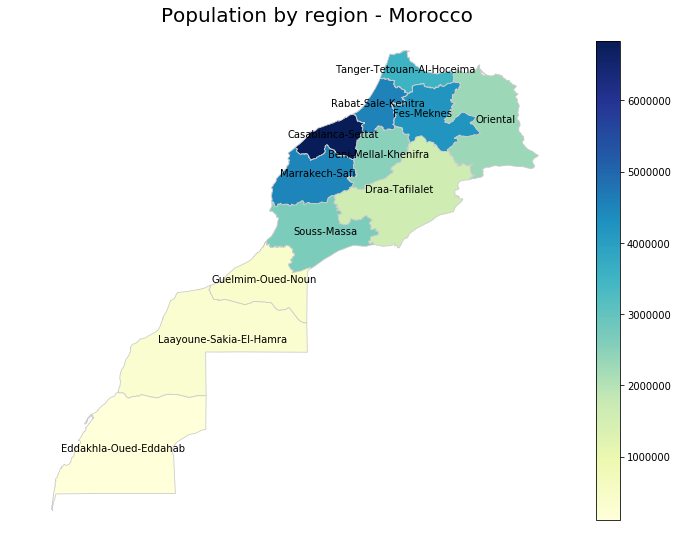

In [8]:
#Plot maps
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,11))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="YlGnBu",linewidth=0.8,edgecolor='0.8',legend=True,ax=ax,legend_kwds={'shrink': 0.8})
for idx, row in gpp.iterrows():
    plt.annotate(s=row['Region'], xy=row['coords'],
                 horizontalalignment='center')
ax.set_title('        Population by region - Morocco ',fontdict={'fontsize': '20','fontweight' : '3'})
plt.axis('off')
plt.show()

## Now let's plot population by provinces

In [12]:
# A simple function to import data 
#it depends on the context
def loadData(sheet_name,region):
    data= pd.read_excel ("C:/Users/pc/Desktop/MoroccoMap/geo_example.xlsx", sheet_name=sheet_name)
    #print(data)
    gp=geomaroc.getProvince(region)
    data["Province"]=list(map(lambda x : x.replace("é","e").replace("è","e").replace("â","a").replace(" ","-"),data["Province"]))
    gp.rename(columns={"Province_fr":"Province"},inplace=True)
    gp=pd.merge(data, gp, on='Province')
    gp=gpd.GeoDataFrame(gp, geometry='Coordinates')
    return gp

In [10]:
gp=loadData('Tanger',"Tanger-Tetouan-Al-Hoceima")

         Province  Population
0  Tanger-Assilah     1060261
1         Tétouan      547177
2         Larache      495030
3     Chefchaouen      456701
4      Al Hoceima      397708
5        Ouezzane      298751
6      Mdiq-Fnidq      208899
7      Fahs-Anjra       75485


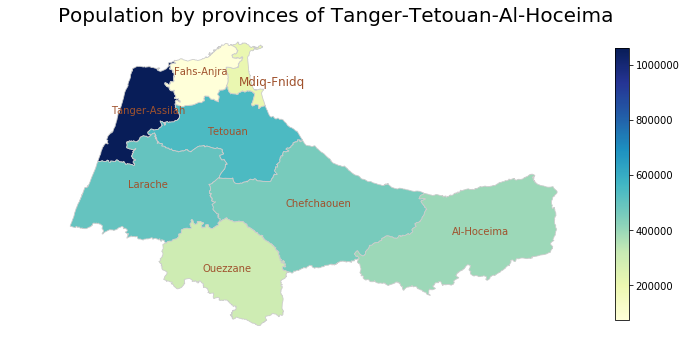

In [11]:
fig, ax = plt.subplots(figsize = (12,10))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="YlGnBu",linewidth=0.8,edgecolor='0.8',legend=True,ax=ax,legend_kwds={'shrink': 0.5})
for idx, row in gpp.iterrows():
    if idx==6:
        plt.annotate(s=row['Province'],color="sienna",size=12, xy=row['coords'],verticalalignment='top',horizontalalignment='left')
        continue
    plt.annotate(s=row['Province'], xy=row['coords'],horizontalalignment='center',color='sienna',size=10)
ax.set_title('        Population by provinces of Tanger-Tetouan-Al-Hoceima ',fontdict={'fontsize': '20','fontweight' : '3'})
plt.axis('off')
plt.show()

In [13]:
gp=loadData('Rabat',"Rabat-Sale-Kenitra")

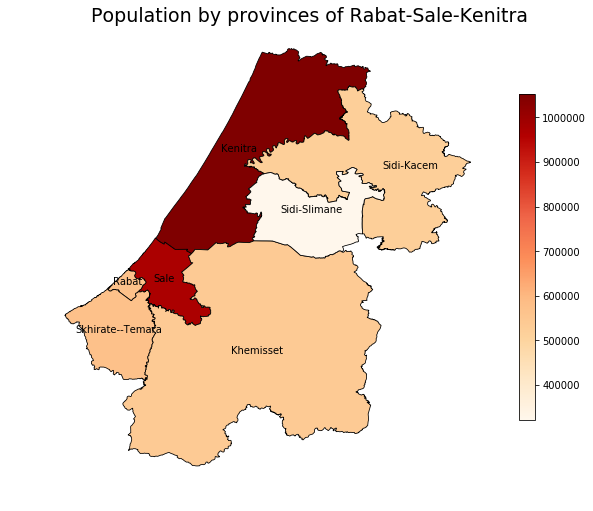

In [14]:
fig, ax = plt.subplots(figsize = (10,10))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="OrRd",linewidth=0.8,edgecolor='k',legend=True,ax=ax,legend_kwds={'shrink': 0.6})
for idx, row in gpp.iterrows():
    plt.annotate(s=row['Province'], xy=row['coords'],horizontalalignment='center',size=10)
ax.set_title('              Population by provinces of Rabat-Sale-Kenitra',fontdict={'fontsize': '19','fontweight' : '3'})
plt.axis('off')
plt.show()

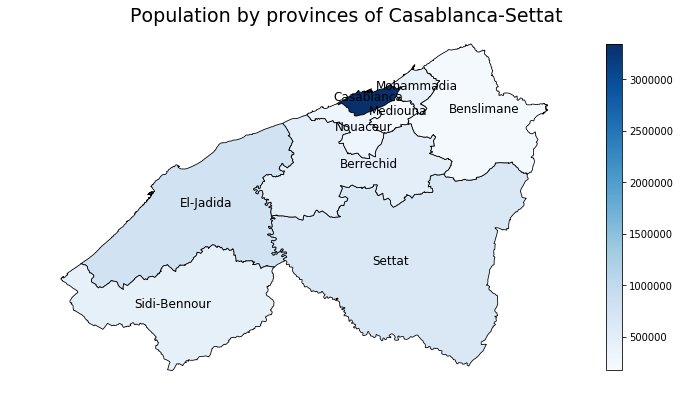

In [15]:
gp=loadData('Casablanca',"Casablanca-Settat")
fig, ax = plt.subplots(figsize = (12,10))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="Blues",linewidth=0.8,edgecolor='k',legend=True,ax=ax,legend_kwds={'shrink': 0.6})
for idx, row in gpp.iterrows():
    plt.annotate(s=row['Province'], xy=row['coords'],horizontalalignment='center',size=12)
ax.set_title('              Population by provinces of Casablanca-Settat',fontdict={'fontsize': '19','fontweight' : '3'})
plt.axis('off')
plt.show()

## Now let's plot population by districts

In [16]:
def loaddata2(sheet_name,province):
    data= pd.read_excel ("C:/Users/pc/Desktop/MoroccoMap/geo_example.xlsx", sheet_name=sheet_name)
    gp=geomaroc.getDistrict(province)
    data["District"]=list(map(lambda x : x.replace("é","e").replace("è","e").replace("â","a").replace(" ","-"),data["District"]))
    gp.rename(columns={"libelle_fr":"District"},inplace=True)
    gp=pd.merge(data, gp, on='District')
    gp=gpd.GeoDataFrame(gp, geometry='Coordinates')
    return gp

In [17]:
gp=loaddata2('Tanger-assilah','Tanger-Assilah')

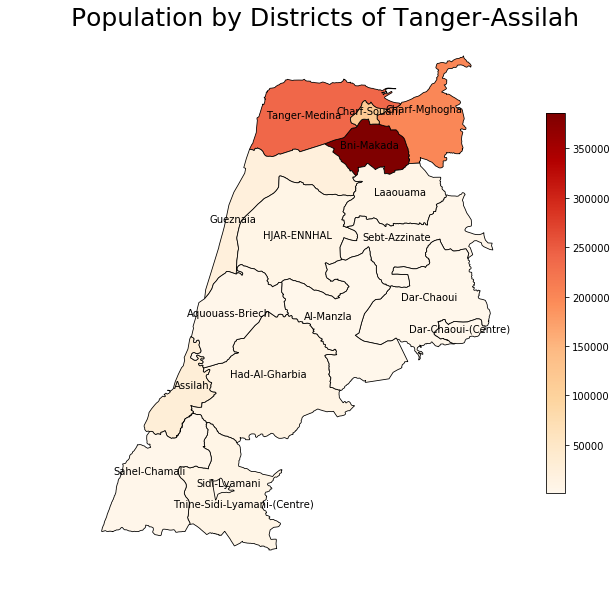

In [19]:
fig, ax = plt.subplots(figsize = (12,10))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="OrRd",linewidth=0.8,edgecolor='k',legend=True,ax=ax,legend_kwds={'shrink': 0.7})
for idx, row in gpp.iterrows():
    if idx==16:
        plt.annotate(s=row['District'], xy=(row['coords'][0]-0.05,row['coords'][1]-0.019),horizontalalignment='left')
        continue
    plt.annotate(s=row['District'], xy=row['coords'],horizontalalignment='center')
ax.set_title('        Population by Districts of Tanger-Assilah ',fontdict={'fontsize': '25','fontweight' : '3'})
plt.axis('off')
plt.show()

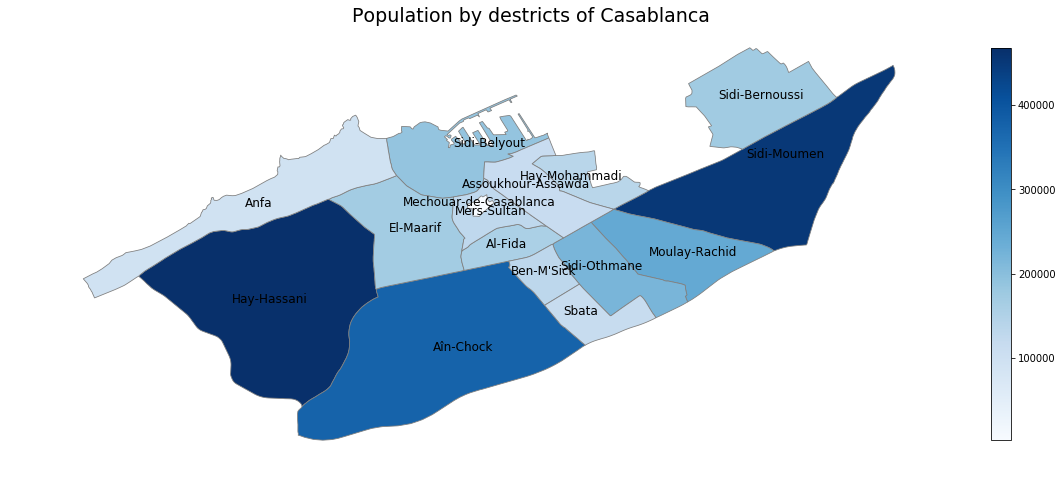

In [20]:
gp=loaddata2('Casa',"Casablanca")
fig, ax = plt.subplots(figsize = (20,12))
gpp=gp.copy()
gpp['coords'] = gpp['Coordinates'].apply(lambda x: x.representative_point().coords[:])
gpp['coords'] = [coords[0] for coords in gpp['coords']]
gpp.plot(column="Population",cmap="Blues",linewidth=0.8,edgecolor='0.5',legend=True,ax=ax,legend_kwds={'shrink': 0.6})
for idx, row in gpp.iterrows():
    
    plt.annotate(s=row['District'], xy=row['coords'],horizontalalignment='center',size=12)
ax.set_title('              Population by destricts of Casablanca',fontdict={'fontsize': '19','fontweight' : '3'})
plt.axis('off')
plt.show()

## Other plots

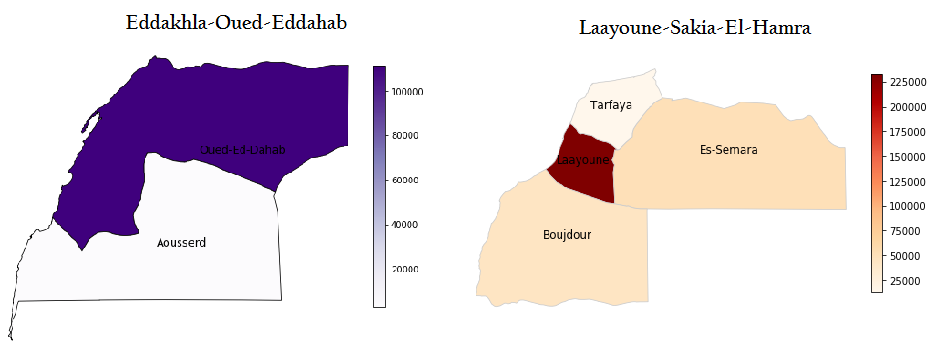

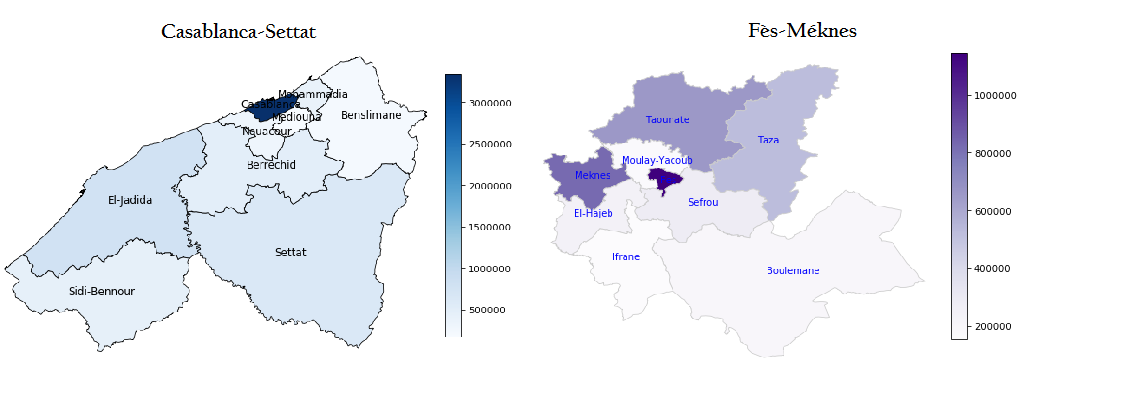